In [5]:
import xarray as xr
import glob

In [22]:
cor_files = glob.glob('/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/*.nc')

In [10]:
cor_files[0]

'/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2014.nc'

In [12]:
w  = xr.open_dataset(cor_files[0])

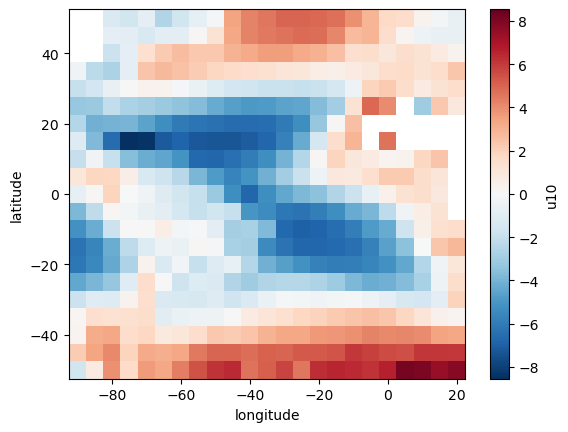

In [18]:
w.u10.mean('time').plot()

In [23]:
cor_files

['/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2014.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2015.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2016.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2017.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2018.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2019.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2021.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysi

In [57]:
import xarray as xr
import os
from collections import defaultdict
import re

# List of file paths
file_paths = cor_files

# Function to extract the variable name and (optionally) pressure level from a file name
# Function to extract the variable name and (optionally) pressure level from a file name
def extract_var_and_level(filename):
    # Regular expression to match the variable name and year (with optional level)
    match = re.match(r'(.+?)_(\d{4})(?:_(\d+hPa))?\.nc', filename)
    if not match:
        raise ValueError(f"Filename {filename} doesn't match the expected pattern")
    var = match.group(1)
    year = match.group(2)
    level = match.group(3)
    return var, level, year

# Organize file paths by variable and level
files_by_var_and_level = defaultdict(list)

for fp in file_paths:
    var, level, year = extract_var_and_level(os.path.basename(fp))
    key = (var, level)
    files_by_var_and_level[key].append(fp)

# Create a dictionary to store the datasets
datasets = {}

for (var, level), files in files_by_var_and_level.items():
    # Sort the files to ensure they are in chronological order
    files.sort()
    # Open each file and concatenate them manually along the time dimension
    ds_list = [xr.open_dataset(f) for f in files]
    ds = xr.concat(ds_list, dim='time')
    # Store the dataset in the dictionary with a descriptive key
    key = f"{var}_{level}" if level else var
    datasets[key] = ds

# # Example: Access a specific dataset
# low_cloud_cover_ds = datasets['low_cloud_cover']
# print(low_cloud_cover_ds)

In [47]:
ds = xr.open_mfdataset(files[0], combine='by_coords')

In [60]:
datasets.keys()

dict_keys(['10m_u_component_of_wind', '10m_v_component_of_wind', 'EIS', 'boundary_layer_height', 'low_cloud_cover', 'mean_sea_level_pressure', 'mean_surface_latent_heat_flux', 'mean_surface_sensible_heat_flux', 'relative_humidity_300hPa', 'relative_humidity_500hPa', 'relative_humidity_700hPa', 'relative_humidity_925hPa', 'sea_surface_temperature', 'sulphate_aerosol_optical_depth_550nm', 'temperature_300hPa', 'temperature_500hPa', 'temperature_700hPa', 'temperature_925hPa', 'temperature', 'total_aerosol_optical_depth_550nm', 'u_component_of_wind_300hPa', 'u_component_of_wind_500hPa', 'u_component_of_wind_700hPa', 'u_component_of_wind_925hPa', 'v_component_of_wind_300hPa', 'v_component_of_wind_500hPa', 'v_component_of_wind_700hPa', 'v_component_of_wind_925hPa', 'vertical_velocity_300hPa', 'vertical_velocity_500hPa', 'vertical_velocity_700hPa', 'vertical_velocity_925hPa'])

In [106]:
list(datasets['u_component_of_wind_500hPa'].keys())

['u']

In [107]:
datasets['10m_u_component_of_wind']

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 23, time: 2393)
Coordinates:
  * latitude   (latitude) int64 -50 -45 -40 -35 -30 -25 ... 25 30 35 40 45 50
  * longitude  (longitude) int64 -90 -85 -80 -75 -70 -65 -60 ... -5 0 5 10 15 20
  * time       (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2021-12-31
Data variables:
    u10        (latitude, longitude, time) float64 nan nan nan ... -0.6927 1.664